<a href="https://colab.research.google.com/github/deepakmoud/Objective-5/blob/main/CLASSI_OF_NAME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRANSFER LEARNING

In [ ]:
#vgg19, 16, mobile net, google net, veg net

In [ ]:
# Importing the Keras libraries and packages
from keras.layers import Input, Flatten, Dense
from keras.models import Sequential
from keras.layers import Convolution2D

from keras.layers import MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
# Instead of using from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator from tensorflow.keras
from keras.models import Model

from keras.callbacks import Callback, ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import warnings
warnings.filterwarnings('ignore')
img_width, img_height = 224, 224

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving Names.zip to Names.zip


In [ ]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/My Drive/Names.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Names.zip'

In [ ]:
# Input parameter
train_data_dir ='/content/drive/My Drive/INT2/NAMES/train'
val_data_dir ='/content/drive/My Drive/INT2/NAMES/ALL'
#TEST_DIR='/content/drive/My Drive/FYP/dataset/TEST_DIR/'
#filepath = '/content/drive/My Drive/FYP/dataset/val/vgg16_Face_weights.hdf5'
nb_epochs = 50


NAME_CLASSES = ['Aaditya','Aarush','Abhay','Agastya','Ajay','Altaf','Aman','AmanN','Amar','Amitabh','Anand','Anuj','Arvind','Asif','Aryan','Bala','Bhavya','BhavyaA','Bikas','Chinmay','David','Dinesh','Durga','Durg','Ejay','Gauri','Gautam','Gopal','Hamid','Harshit','Hemang','Isha','Jinesh','Junaid','Junaaid','Jyoti','Kalpana','Kapil','Karan','Kartik','Kavita','Khalid','Kush','Krishna','Kushi','Lalit','Love','M. Adnan','Mahipal','Manoj','Manish','Meera','Megha','Mohit','Naman','Nawal','Neeta','Niket','Nirmala','Parmod','Pawan','Prakash','Rahul','Raahul','Raghav','Raju','Rajaa','Rajiv','Raju','Ram','Ramesh Soni','Ravi','Rekha','Rhea','Ritiik','Ritik','Riya','Roahit','Rohit','Rudra','Saanvi','Shiv','Shiva','Shivam','Shreya','Shruti','Shweta','Soma','Sudhanshu','Sunil','Sunita','Tanmay','Tilak','Utsav','Vaibhav','Vipul','Vijay','Virat','Yash','Yashwant']
print("Input parameters are assigned")

Input parameters are assigned


In [ ]:
# image data generation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height),
                                                    batch_size=32,shuffle=True, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height),
                                                    batch_size=32,shuffle=True,class_mode='categorical')

Found 3590 images belonging to 100 classes.
Found 3722 images belonging to 100 classes.


In [ ]:
#Load the pretrained Network
vgg16_model = VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_height,img_width,3), pooling=None, classes=1000)
print("pretrained Network is loaded")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
pretrained Network is loaded


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Freeze the layers
for layer in vgg16_model.layers:
    layer.trainable = False
print("Pretrained layers are freezed")

Pretrained layers are freezed


In [ ]:
model = Sequential()
model.add(vgg16_model)
#add fully connected layer:
input_layer=model.add(Flatten())
hidden_layer=model.add(Dense(128, activation='relu', name='hidden_layer'))
classification_layer=model.add(Dense(64, activation='relu', name='classification_layer'))
output_layer=model.add(Dense(100, activation='softmax', name='output_layer'))
print("All layers top of pretrained layers are developed")


All layers top of pretrained layers are developed


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [ ]:
checkpoint = ModelCheckpoint(filepath = '/content/drive/My Drive/INT2/NAMES/train/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit_generator( train_generator, callbacks = callbacks_list, epochs=nb_epochs, validation_data=validation_generator)
print('Training Completed!')

Epoch 1/50
113/113 [==============================] - ETA: 0s - loss: 2.4703 - accuracy: 0.3621

113/113 [==============================] - 866s 8s/step - loss: 2.4703 - accuracy: 0.3621 - val_loss: 1.8245 - val_accuracy: 0.5185
Epoch 2/50
113/113 [==============================] - ETA: 0s - loss: 1.4139 - accuracy: 0.5989

113/113 [==============================] - 71s 628ms/step - loss: 1.4139 - accuracy: 0.5989 - val_loss: 1.1995 - val_accuracy: 0.6631
Epoch 3/50
113/113 [==============================] - ETA: 0s - loss: 0.9241 - accuracy: 0.7181

113/113 [==============================] - 71s 629ms/step - loss: 0.9241 - accuracy: 0.7181 - val_loss: 0.9428 - val_accuracy: 0.7469
Epoch 4/50
113/113 [==============================] - ETA: 0s - loss: 0.6686 - accuracy: 0.7780

113/113 [==============================] - 71s 627ms/step - loss: 0.6686 - accuracy: 0.7780 - val_loss: 0.8635 - val_accuracy: 0.7821
Epoch 5/50
113/113 [==============================] - ETA: 0s - loss: 0.5467 - accuracy: 0.8139

113/113 [==============================] - 71s 631ms/step - loss: 0.5467 - accuracy: 0.8139 - val_loss: 0.7865 - val_accuracy: 0.8028
Epoch 6/50
113/113 [==============================] - ETA: 0s - loss: 0.4845 - accuracy: 0.8150

113/113 [==============================] - 71s 633ms/step - loss: 0.4845 - accuracy: 0.8150 - val_loss: 0.8746 - val_accuracy: 0.7673
Epoch 7/50
113/113 [==============================] - ETA: 0s - loss: 0.4207 - accuracy: 0.8295

113/113 [==============================] - 71s 627ms/step - loss: 0.4207 - accuracy: 0.8295 - val_loss: 0.7212 - val_accuracy: 0.8318
Epoch 8/50
113/113 [==============================] - ETA: 0s - loss: 0.3702 - accuracy: 0.8401

113/113 [==============================] - 71s 627ms/step - loss: 0.3702 - accuracy: 0.8401 - val_loss: 0.7140 - val_accuracy: 0.8332
Epoch 9/50
113/113 [==============================] - ETA: 0s - loss: 0.3418 - accuracy: 0.8440

113/113 [==============================] - 71s 632ms/step - loss: 0.3418 - accuracy: 0.8440 - val_loss: 0.7107 - val_accuracy: 0.8426
Epoch 10/50
113/113 [==============================] - ETA: 0s - loss: 0.3213 - accuracy: 0.8568

113/113 [==============================] - 71s 629ms/step - loss: 0.3213 - accuracy: 0.8568 - val_loss: 0.7108 - val_accuracy: 0.8409
Epoch 11/50
113/113 [==============================] - ETA: 0s - loss: 0.3281 - accuracy: 0.8460

113/113 [==============================] - 70s 625ms/step - loss: 0.3281 - accuracy: 0.8460 - val_loss: 0.6791 - val_accuracy: 0.8452
Epoch 12/50
113/113 [==============================] - ETA: 0s - loss: 0.2919 - accuracy: 0.8599

113/113 [==============================] - 71s 632ms/step - loss: 0.2919 - accuracy: 0.8599 - val_loss: 0.7015 - val_accuracy: 0.8361
Epoch 13/50
113/113 [==============================] - ETA: 0s - loss: 0.2779 - accuracy: 0.8627

113/113 [==============================] - 71s 630ms/step - loss: 0.2779 - accuracy: 0.8627 - val_loss: 0.6992 - val_accuracy: 0.8439
Epoch 14/50
112/113 [============================>.] - ETA: 0s - loss: 0.2630 - accuracy: 0.8571

113/113 [==============================] - 72s 635ms/step - loss: 0.2627 - accuracy: 0.8574 - val_loss: 0.6765 - val_accuracy: 0.8452
Epoch 15/50
113/113 [==============================] - ETA: 0s - loss: 0.2646 - accuracy: 0.8624

113/113 [==============================] - 71s 625ms/step - loss: 0.2646 - accuracy: 0.8624 - val_loss: 0.7280 - val_accuracy: 0.8431
Epoch 16/50
113/113 [==============================] - ETA: 0s - loss: 0.2495 - accuracy: 0.8621

113/113 [==============================] - 71s 628ms/step - loss: 0.2495 - accuracy: 0.8621 - val_loss: 0.7072 - val_accuracy: 0.8455
Epoch 17/50
113/113 [==============================] - ETA: 0s - loss: 0.2500 - accuracy: 0.8696

113/113 [==============================] - 72s 635ms/step - loss: 0.2500 - accuracy: 0.8696 - val_loss: 0.6983 - val_accuracy: 0.8442
Epoch 18/50
113/113 [==============================] - ETA: 0s - loss: 0.2529 - accuracy: 0.8577

113/113 [==============================] - 72s 634ms/step - loss: 0.2529 - accuracy: 0.8577 - val_loss: 0.7014 - val_accuracy: 0.8452
Epoch 19/50
113/113 [==============================] - ETA: 0s - loss: 0.2437 - accuracy: 0.8630

113/113 [==============================] - 72s 636ms/step - loss: 0.2437 - accuracy: 0.8630 - val_loss: 0.7130 - val_accuracy: 0.8461
Epoch 20/50
113/113 [==============================] - ETA: 0s - loss: 0.2521 - accuracy: 0.8635

113/113 [==============================] - 75s 666ms/step - loss: 0.2521 - accuracy: 0.8635 - val_loss: 0.7203 - val_accuracy: 0.8458
Epoch 21/50
113/113 [==============================] - ETA: 0s - loss: 0.2358 - accuracy: 0.8649

113/113 [==============================] - 71s 630ms/step - loss: 0.2358 - accuracy: 0.8649 - val_loss: 0.7272 - val_accuracy: 0.8431
Epoch 22/50
113/113 [==============================] - ETA: 0s - loss: 0.2381 - accuracy: 0.8602

113/113 [==============================] - 71s 625ms/step - loss: 0.2381 - accuracy: 0.8602 - val_loss: 0.7031 - val_accuracy: 0.8436
Epoch 23/50
113/113 [==============================] - ETA: 0s - loss: 0.2371 - accuracy: 0.8663

113/113 [==============================] - 70s 624ms/step - loss: 0.2371 - accuracy: 0.8663 - val_loss: 0.6984 - val_accuracy: 0.8423
Epoch 24/50
113/113 [==============================] - ETA: 0s - loss: 0.2403 - accuracy: 0.8604

113/113 [==============================] - 70s 623ms/step - loss: 0.2403 - accuracy: 0.8604 - val_loss: 0.7028 - val_accuracy: 0.8385
Epoch 25/50
113/113 [==============================] - ETA: 0s - loss: 0.2337 - accuracy: 0.8716

113/113 [==============================] - 70s 624ms/step - loss: 0.2337 - accuracy: 0.8716 - val_loss: 0.6953 - val_accuracy: 0.8450
Epoch 26/50
113/113 [==============================] - ETA: 0s - loss: 0.2304 - accuracy: 0.8763

113/113 [==============================] - 71s 625ms/step - loss: 0.2304 - accuracy: 0.8763 - val_loss: 0.7492 - val_accuracy: 0.8444
Epoch 27/50
113/113 [==============================] - ETA: 0s - loss: 0.2542 - accuracy: 0.8616

113/113 [==============================] - 70s 623ms/step - loss: 0.2542 - accuracy: 0.8616 - val_loss: 0.7138 - val_accuracy: 0.8366
Epoch 28/50
113/113 [==============================] - ETA: 0s - loss: 0.2423 - accuracy: 0.8682

113/113 [==============================] - 70s 619ms/step - loss: 0.2423 - accuracy: 0.8682 - val_loss: 0.7254 - val_accuracy: 0.8447
Epoch 29/50
113/113 [==============================] - ETA: 0s - loss: 0.2232 - accuracy: 0.8638

113/113 [==============================] - 70s 621ms/step - loss: 0.2232 - accuracy: 0.8638 - val_loss: 0.7227 - val_accuracy: 0.8461
Epoch 30/50
113/113 [==============================] - ETA: 0s - loss: 0.2257 - accuracy: 0.8696

113/113 [==============================] - 70s 623ms/step - loss: 0.2257 - accuracy: 0.8696 - val_loss: 0.7852 - val_accuracy: 0.8434
Epoch 31/50
113/113 [==============================] - ETA: 0s - loss: 0.2223 - accuracy: 0.8719

113/113 [==============================] - 70s 617ms/step - loss: 0.2223 - accuracy: 0.8719 - val_loss: 0.8042 - val_accuracy: 0.8444
Epoch 32/50
113/113 [==============================] - ETA: 0s - loss: 0.2219 - accuracy: 0.8719

113/113 [==============================] - 70s 614ms/step - loss: 0.2219 - accuracy: 0.8719 - val_loss: 0.7517 - val_accuracy: 0.8442
Epoch 33/50
113/113 [==============================] - ETA: 0s - loss: 0.2301 - accuracy: 0.8694

113/113 [==============================] - 75s 659ms/step - loss: 0.2301 - accuracy: 0.8694 - val_loss: 0.8079 - val_accuracy: 0.8444
Epoch 34/50
113/113 [==============================] - ETA: 0s - loss: 0.2311 - accuracy: 0.8635

113/113 [==============================] - 75s 666ms/step - loss: 0.2311 - accuracy: 0.8635 - val_loss: 0.7752 - val_accuracy: 0.8447
Epoch 35/50
113/113 [==============================] - ETA: 0s - loss: 0.2248 - accuracy: 0.8710

113/113 [==============================] - 71s 626ms/step - loss: 0.2248 - accuracy: 0.8710 - val_loss: 0.7907 - val_accuracy: 0.8461
Epoch 36/50
113/113 [==============================] - ETA: 0s - loss: 0.2200 - accuracy: 0.8627

113/113 [==============================] - 71s 627ms/step - loss: 0.2200 - accuracy: 0.8627 - val_loss: 0.7935 - val_accuracy: 0.8450
Epoch 37/50
113/113 [==============================] - ETA: 0s - loss: 0.2224 - accuracy: 0.8671

113/113 [==============================] - 71s 627ms/step - loss: 0.2224 - accuracy: 0.8671 - val_loss: 0.7407 - val_accuracy: 0.8461
Epoch 38/50
113/113 [==============================] - ETA: 0s - loss: 0.2238 - accuracy: 0.8688

113/113 [==============================] - 72s 635ms/step - loss: 0.2238 - accuracy: 0.8688 - val_loss: 0.7573 - val_accuracy: 0.8418
Epoch 39/50
113/113 [==============================] - ETA: 0s - loss: 0.2639 - accuracy: 0.8504

113/113 [==============================] - 70s 618ms/step - loss: 0.2639 - accuracy: 0.8504 - val_loss: 0.7986 - val_accuracy: 0.8452
Epoch 40/50
113/113 [==============================] - ETA: 0s - loss: 0.2094 - accuracy: 0.8685

113/113 [==============================] - 70s 623ms/step - loss: 0.2094 - accuracy: 0.8685 - val_loss: 0.7653 - val_accuracy: 0.8461
Epoch 41/50
113/113 [==============================] - ETA: 0s - loss: 0.2130 - accuracy: 0.8705

113/113 [==============================] - 70s 617ms/step - loss: 0.2130 - accuracy: 0.8705 - val_loss: 0.8060 - val_accuracy: 0.8461
Epoch 42/50
113/113 [==============================] - ETA: 0s - loss: 0.2033 - accuracy: 0.8685

113/113 [==============================] - 70s 618ms/step - loss: 0.2033 - accuracy: 0.8685 - val_loss: 0.7569 - val_accuracy: 0.8461
Epoch 43/50
113/113 [==============================] - ETA: 0s - loss: 0.2326 - accuracy: 0.8680

113/113 [==============================] - 74s 658ms/step - loss: 0.2326 - accuracy: 0.8680 - val_loss: 0.8503 - val_accuracy: 0.8342
Epoch 44/50
113/113 [==============================] - ETA: 0s - loss: 0.2295 - accuracy: 0.8630

113/113 [==============================] - 70s 618ms/step - loss: 0.2295 - accuracy: 0.8630 - val_loss: 0.8040 - val_accuracy: 0.8447
Epoch 45/50
113/113 [==============================] - ETA: 0s - loss: 0.2214 - accuracy: 0.8663

113/113 [==============================] - 70s 619ms/step - loss: 0.2214 - accuracy: 0.8663 - val_loss: 0.8538 - val_accuracy: 0.8434
Epoch 46/50
113/113 [==============================] - ETA: 0s - loss: 0.2172 - accuracy: 0.8663

113/113 [==============================] - 70s 624ms/step - loss: 0.2172 - accuracy: 0.8663 - val_loss: 0.8758 - val_accuracy: 0.8455
Epoch 47/50
113/113 [==============================] - ETA: 0s - loss: 0.2430 - accuracy: 0.8607

113/113 [==============================] - 72s 637ms/step - loss: 0.2430 - accuracy: 0.8607 - val_loss: 0.7912 - val_accuracy: 0.8455
Epoch 48/50
113/113 [==============================] - ETA: 0s - loss: 0.2124 - accuracy: 0.8649

113/113 [==============================] - 71s 629ms/step - loss: 0.2124 - accuracy: 0.8649 - val_loss: 0.8342 - val_accuracy: 0.8428
Epoch 49/50
113/113 [==============================] - ETA: 0s - loss: 0.2358 - accuracy: 0.8657

113/113 [==============================] - 71s 626ms/step - loss: 0.2358 - accuracy: 0.8657 - val_loss: 0.9289 - val_accuracy: 0.8353
Epoch 50/50
113/113 [==============================] - ETA: 0s - loss: 0.2309 - accuracy: 0.8526

113/113 [==============================] - 96s 851ms/step - loss: 0.2309 - accuracy: 0.8526 - val_loss: 0.8323 - val_accuracy: 0.8431
Training Completed!


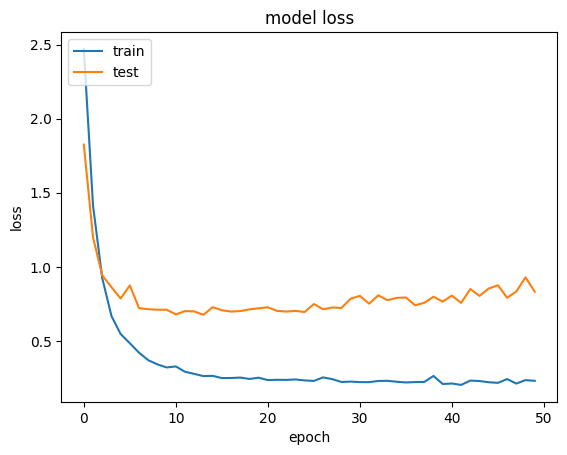

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


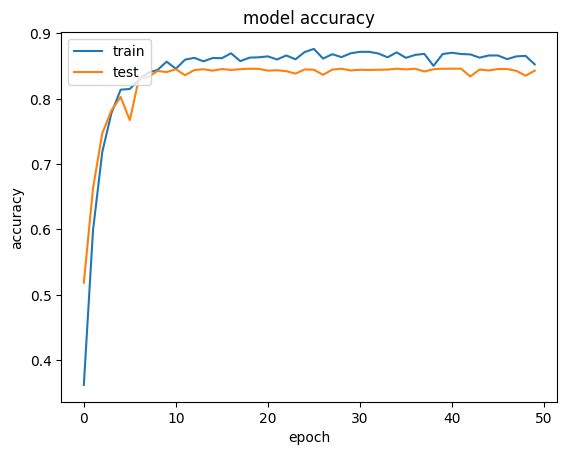

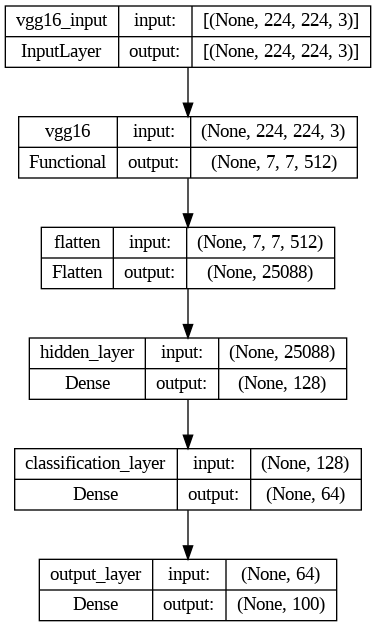

In [ ]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')



plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/INT2/NAMES/model_plot_CNN.png', show_shapes=True, show_layer_names=True)

In [ ]:
# save model and architecture to single file
model.save('/content/drive/My Drive/INT2/NAMES/name.h5')
model.summary()

print("Saved model to disk")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 hidden_layer (Dense)        (None, 128)               3211392   
                                                                 
 classification_layer (Dense  (None, 64)               8256      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 100)               6500      
                                                                 
Total params: 17,940,836
Trainable params: 3,226,148
Non-trainable params: 14,714,688
____________________________________

In [ ]:
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/INT2/NAMES/name.h5')
print("Model is Loaded")
model.summary()

Model is Loaded


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer (Dense)                 │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification_layer (Dense)         │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,940,838 (68.44 MB)

 Trainable params: 3,226,148 (12.31 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 1.jpeg to 1.jpeg


In [ ]:
import keras
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array

from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
from keras.models import load_model
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click to know Name " )
output = widgets.Output()


In [ ]:
img1 = '1.jpeg'
img = keras.utils.load_img(img1, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
print(block4_pool_features)
label_index=block4_pool_features.argmax()
print(label_index)
def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print("Signarure is of  "  +NAME_CLASSES[label_index])

button.on_click(on_button_clicked)
display(button, output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 3.8214991e-34 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.8115318e-43
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+0

Button(description='Click to know Name ', style=ButtonStyle())

Output()

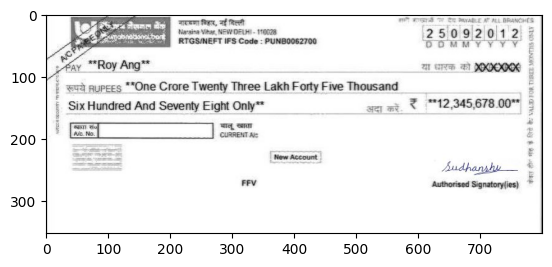

Model prediction : Anuj

# Evaluate on test data


ValueError: Expected all entries in the `metrics` list to be metric objects. Received instead:
metrics=[[<MeanMetricWrapper name=accuracy>]]

In [ ]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread

# load image pixels
image = imread(img1)
# plot raw pixel data
pyplot.imshow(image)
# show the figure
pyplot.show()

print("Model prediction :", NAME_CLASSES[label_index])
from keras.models import load_model


# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(validation_generator)
print('test loss, test acc:', results)


In [ ]:
y_pred=model.predict(validation_generator)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print("Shape of predicted labels", y_pred.shape)

117/117 [==============================] - 17s 141ms/step
[39 96 25 ... 64 24 15]
Shape of predicted labels (3722,)


In [ ]:
# identification of test labels
import numpy as np
batch_size=32
sample_count=32

features_test = np.zeros(shape=(1613, 64))  # Must be equal to the output of the convolutional base
labels_test = np.zeros(shape=(1613,100))
i = 0
for inputs_batch, labels_batch in validation_generator:

  labels_test[i * batch_size: (i + 1) * batch_size] = labels_batch
  i += 1
  if i*batch_size  >= sample_count:
    break
print(labels_test.shape)
labels_test=np.argmax(labels_test,axis=1)
print(labels_test)
print("Shape of labels original", labels_test.shape)


(1613, 100)
[10 50 26 ...  0  0  0]
Shape of labels original (1613,)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(labels_test, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(labels_test, y_pred))

Classification report 


ValueError: ignored

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(labels_test,y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Aaditya','Aarush','Abhay','Agastya','Ajay','Altaf','Aman','AmanN','Amar','Amitabh','Anand','Anuj','Arvind','Asif','Aryan','Bala','Bhavya','BhavyaA','Bikas','Chinmay','David','Dinesh','Durga','Durg','Ejay','Gauri','Gautam','Gopal','Hamid','Harshit','Hemang','Isha','Jinesh','Junaid','Junaaid','Jyoti','Kalpana','Kapil','Karan','Kartik','Kavita','Khalid','Kush','Krishna','Kushi','Lalit','Love','M. Adnan','Mahipal','Manoj','Manish','Meera','Megha','Mohit','Naman','Nawal','Neeta','Niket','Nirmala','Parmod','Pawan','Prakash','Rahul','Raahul','Raghav','Raju','Rajaa','Rajiv','Raju','Ram','Ramesh Soni','Ravi','Rekha','Rhea','Ritiik','Ritik','Riya','Roahit','Rohit','Rudra','Saanvi','Shiv','Shiva','Shivam','Shreya','Shruti','Shweta','Soma','Sudhanshu','Sunil','Sunita','Tanmay','Tilak','Utsav','Vaibhav','Vipul','Vijay','Virat','Yash','Yashwant']);

plt.xlabel('predicted value')
plt.ylabel('true value');

ValueError: ignored

In [ ]:
# Extracting Features from classification Layer
from keras.models import Model
layer_name= 'classification_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
print("Imtermediate model is constructed")


Imtermediate model is constructed


In [ ]:
# Compilation of intermediate model
intermediate_layer_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [ ]:
# Saving intermediate model
intermediate_layer_model.save('/content/drive/My Drive/INT2/NAMES/name_intermediate.h5')
intermediate_layer_model.summary()

print("Saved Intermediate model to disk")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 hidden_layer (Dense)        (None, 128)               3211392   
                                                                 
 classification_layer (Dense  (None, 64)               8256      
 )                                                               
                                                                 
Total params: 17,934,336
Trainable params: 3,219,648
Non-trainable params: 14,714,688
_________________________________________

In [ ]:
# Loading Intermediate Model
from keras.models import load_model

model = load_model('/content/drive/My Drive/INT2/NAMES/name_intermediate.h5')
print("Intermediate model is loaded")

Intermediate model is loaded


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 hidden_layer (Dense)        (None, 128)               3211392   
                                                                 
 classification_layer (Dense  (None, 64)               8256      
 )                                                               
                                                                 
Total params: 17,934,336
Trainable params: 3,219,648
Non-trainable params: 14,714,688
_________________________________________

In [ ]:
# Training Label feature identification(y_train)
import numpy as np
batch_size=32
sample_count=96
features = np.zeros(shape=(150, 64))  # Must be equal to the output of the convolutional base
labels = np.zeros(shape=(150, 10))
i = 0
for inputs_batch, labels_batch in train_generator:
  features_batch = model.predict(inputs_batch)
  print(features_batch.shape)
  features[i * batch_size: (i + 1) * batch_size] = features_batch
  labels[i * batch_size: (i + 1) * batch_size]= labels_batch
  i += 1
  if i*batch_size  >= sample_count:
    break
print(labels.shape)
print(features.shape)

1/1 [==============================] - 0s 43ms/step
(32, 64)
1/1 [==============================] - 0s 26ms/step
(32, 64)
1/1 [==============================] - 0s 29ms/step
(32, 64)
(150, 10)
(150, 64)


In [ ]:
print(labels)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#identification of training Labels
features_train=features
print(features_train.shape)
labels_train=labels
print(labels_train.shape)
print(labels)
print(features_train)

(150, 64)
(150, 10)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         3.76770234 ... 0.         0.         0.96197581]
 [0.         0.         4.01419687 ... 0.         0.         0.18996508]
 [0.         0.         7.01003313 ... 0.         0.         5.74318171]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
# identification of test labels
import numpy as np
batch_size=32
sample_count=32
features_test = np.zeros(shape=(150, 64))  # Must be equal to the output of the convolutional base
labels_test = np.zeros(shape=(150,10))
i = 0
for inputs_batch, labels_batch in validation_generator:
  features_batch = model.predict(inputs_batch)
  features_test[i * batch_size: (i + 1) * batch_size] = features_batch
  labels_test[i * batch_size: (i + 1) * batch_size] = labels_batch
  i += 1
  if i*batch_size  >= sample_count:
    break
print(labels_test.shape)
print(features_test.shape)
print(labels_test)

1/1 [==============================] - 0s 26ms/step
(150, 10)
(150, 64)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Random Forest
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
#print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='micro')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='micro')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='micro')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
Accuracy: 98.000
Precision: 100.000
Recall: 90.625
F-Measure: 95.082


In [ ]:
!pip install streamlit==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ngrok authtoken

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import os
from werkzeug.utils import secure_filename
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import scipy
from scipy import stats
st.set_option('deprecation.showfileUploaderEncoding', False)
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/INT/NAMES/name.h5')
NAME_CLASSES = ['Abhay','Amitabh','Hemang','Jinesh','Kalpana','Manish','Neeta','Niket','Sudhanshu','Tanmay']
html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Final Year Project</p></center>
   <center><p style="font-size:30px;color:white;margin-top:10px;">Signarure Varification & Validation</p></center>
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

st.title("""
        Signature Recognition
         """
         )
file= st.file_uploader("Please upload signature here ", type=("jpg", "png","jpeg"))

import cv2
from  PIL import Image, ImageOps
def import_and_predict(image_data):
  #x = cv2.resize(image_data, (48, 48))
  #img = image.load_img(image_data, target_size=(48, 48))
  #x = image.img_to_array(img)
  size=(224, 224)
  image=ImageOps.fit(image_data, size, Image.ANTIALIAS)
  img=np.asarray(image)
  img_reshape=np.expand_dims(img, axis=1)
  img_reshape=img[np.newaxis,...]
  features = model.predict(img_reshape)
  print(features)
  label_index=features.argmax()
  print(label_index)
  print("Model prediction :", NAME_CLASSES[label_index])

  return NAME_CLASSES[label_index]
if file is None:
  st.text("Please upload an Image file")
else:
  image=Image.open(file)
  #image=np.array(image)
  #file_bytes = np.asarray(bytearray(file.read()), dtype=np.uint8)
  #image = cv2.imdecode(file_bytes, 1)
  st.image(image,caption='Uploaded Image.', use_column_width=True)

if st.button("Revel Name"):
  result=import_and_predict(image)
  st.success('Model has predicted the Signature is   {}'.format(result))
if st.button("About"):
  st.header(" Sudhanshu Sharma")
  st.subheader("Student, Department of Computer Engineering")

html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Machine Learning Experiment</p></center>
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://d388-34-143-170-173.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py

2022-11-13 06:01:00.474 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.143.170.173:80

2022-11-13 06:01:08.393622: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
1/1 [==============================] - 3s 3s/step
[[1.7838777e-04 8.1472772e-19 5.5809746e-22 1.5064681e-04 7.0703931e-23
  1.2662244e-33 9.9967098e-01 7.0517859e-29 2.1251414e-19 5.3438484e-19]]
6
Model prediction : Neeta
1/1 [==============================] - 0s 137ms/step
[[1.3300652e-06 4.5488277e-35 4.5502104e-30 1.3678952e-07 1.9942820e-21
  0.0000000e+00 1.9817394e-20 9.9999857e-01 4.6638253e-29 2.5284735e-28]]
7
Model prediction : Niket
  Stopping...
^C
